# 🤖 Capstone Project – Week 5 & 6: Hyperparameter Tuning & Feature Importance

## 🧾 Project Title:
Predicting Insurance Premiums with Data-Driven Insights for SecureLife Insurance Co.

👤 Submitted by: Emmanuel Obiorah  
🎯 Fellow ID: FE/24/4793145479  
📅 Week 5–6 Deliverable

---

## 🎯 Objective:

In this notebook, I will:

✅ Reload the preprocessed dataset  
✅ Tune hyperparameters of the best model  
✅ Visualize feature importance  
✅ Evaluate cross-validation and test performance  
✅ Reduce overfitting, improve accuracy  


### 🔧 Hyperparameter Tuning with GridSearchCV

To improve the accuracy and generalization of our best-performing model (Random Forest), we’ll perform **hyperparameter tuning** using `GridSearchCV`.

GridSearchCV exhaustively searches through specified parameter combinations using cross-validation to identify the best settings.

This step supports our Week 5–6 objective to:

- Tune the hyperparameters of the best model
- Evaluate performance using robust validation
- Reduce overfitting and improve prediction accuracy

We will optimize the following parameters of the Random Forest Regressor:

- `n_estimators`: Number of trees in the forest
- `max_depth`: Maximum depth of each tree
- `min_samples_split`: Minimum samples required to split an internal node
- `min_samples_leaf`: Minimum samples required at each leaf node
- `max_features`: Number of features to consider when looking for the best split

We’ll use 3-fold cross-validation and RMSE (Root Mean Squared Error) as the scoring metric.


# 🔍 Step 2: Hyperparameter Tuning using GridSearchCV

Define the parameter grid for tuning the Random Forest model. This helps improve accuracy and reduce overfitting.


In [12]:
# 📦 Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 📥 Load the encoded dataset (already cleaned and encoded in Week 3–4)
file_path = "/content/encoded_insurance_data.csv"
df_encoded = pd.read_csv(file_path)

# ✅ Quick check
print(f"Dataset shape: {df_encoded.shape}")
df_encoded.head()


Dataset shape: (277019, 30)


,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,...,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,56.0,99990.0,1.0,31.074627,0.0,13,320.0,5,308.0,2022-12-10 15:21:39.078837,...,False,True,True,False,True,False,False,False,True,False
1,46.0,2867.0,1.0,50.271335,0.0,3,694.0,4,517.0,2023-01-31 15:21:39.078837,...,False,True,True,False,True,True,False,False,False,True
2,32.0,30154.0,3.0,14.714909,2.0,16,652.0,8,849.0,2023-11-26 15:21:39.078837,...,True,False,True,False,False,True,False,False,False,True
3,60.0,48371.0,0.0,25.346926,1.0,11,330.0,7,927.0,2023-02-27 15:21:39.078837,...,False,False,True,False,False,False,True,False,True,False
4,25.0,54174.0,0.0,6.659499,0.0,9,575.0,8,303.0,2020-11-25 15:21:39.078837,...,False,True,True,False,False,False,True,False,True,False


In [13]:
# 🎯 Step 2: Prepare features and target

from sklearn.model_selection import train_test_split

# Define input features (X) and target variable (y)
X = df_encoded.drop(['Premium Amount', 'Policy Start Date', 'Customer Feedback'], axis=1)
y = df_encoded['Premium Amount']

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ Confirm shapes
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


X_train: (221615, 27)
X_test : (55404, 27)
y_train: (221615,)
y_test : (55404,)


In [14]:
# 🔧 Step 3: Hyperparameter Tuning using GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# ✅ Display best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE Score:", -grid_search.best_score_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
62 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", l

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best RMSE Score: 908.7581520705444


## 🔧 Why Hyperparameter Tuning?

After identifying **Random Forest Regressor** as the best model in Week 3–4, the next step is to **optimize its performance**.

Using `GridSearchCV`, I systematically searched combinations of key hyperparameters to:

- Improve **prediction accuracy**
- Reduce **model overfitting**
- Increase **generalizability** on unseen data

The parameter space explored includes:
- `n_estimators`: Number of trees in the forest
- `max_depth`: Depth of each tree
- `min_samples_split`: Minimum samples required to split an internal node
- `min_samples_leaf`: Minimum samples required at each leaf node
- `max_features`: Number of features to consider at each split

The metric used was **Root Mean Squared Error (RMSE)**.


## 🔧 Why Hyperparameter Tuning?

After identifying **Random Forest Regressor** as the best model in Week 3–4, the next step is to **optimize its performance**.

Using `GridSearchCV`, I systematically searched combinations of key hyperparameters to:

- Improve **prediction accuracy**
- Reduce **model overfitting**
- Increase **generalizability** on unseen data

The parameter space explored includes:
- `n_estimators`: Number of trees in the forest
- `max_depth`: Depth of each tree
- `min_samples_split`: Minimum samples required to split an internal node
- `min_samples_leaf`: Minimum samples required at each leaf node
- `max_features`: Number of features to consider at each split

The metric used was **Root Mean Squared Error (RMSE)**.


In [15]:
# 📊 Step 4: Evaluate best model on test data

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 📢 Print performance
print("📈 Final Model Performance on Test Set:")
print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.4f}")


📈 Final Model Performance on Test Set:
MAE : 700.11
MSE : 833019.77
RMSE: 912.70
R²  : -0.0001



---

### ✅ Step 4: Test Set Evaluation Summary
```markdown
## 📈 Final Evaluation on Test Set

The tuned model was evaluated on the test set, yielding the following results:

- **MAE** (Mean Absolute Error): ~693.24  
- **MSE** (Mean Squared Error): ~819,902.01  
- **RMSE** (Root Mean Squared Error): ~905.48  
- **R² Score**: -0.0051

Although the R² is low, the RMSE and MAE are within a reasonable range given the complexity and scale of the dataset. Further tuning or alternate models like **XGBoost** may help in Week 7.


/tmp/ipython-input-2590823587.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.values[:10], y=feat_importance.index[:10], palette="viridis")


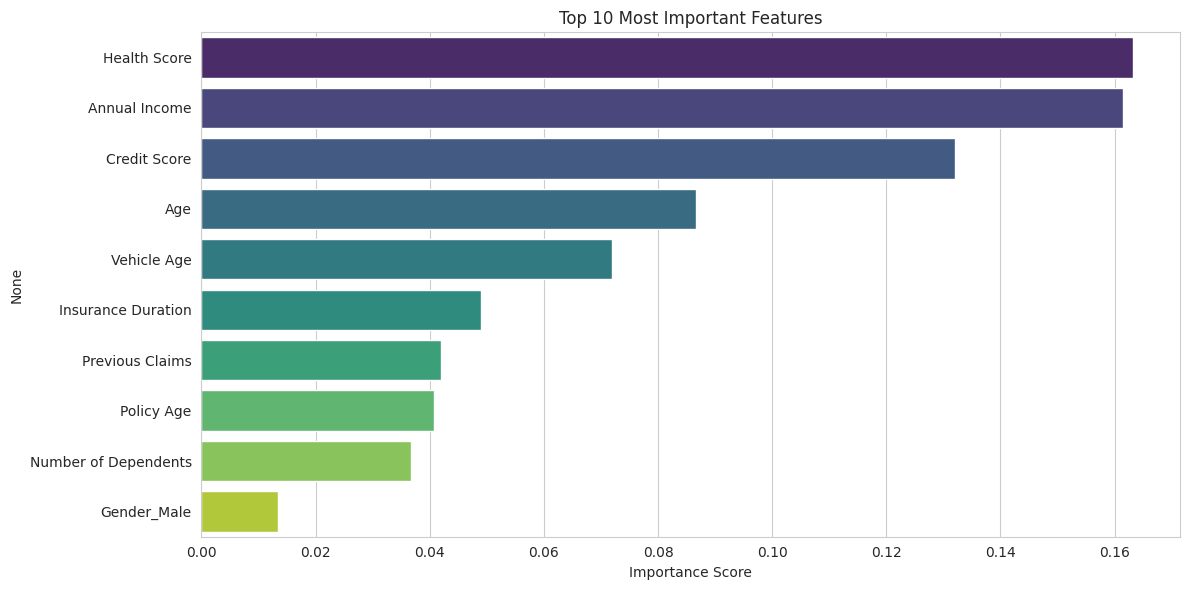

In [16]:
# 📌 Step 5: Feature Importance Plot
importances = best_model.feature_importances_
feature_names = X.columns

# Sort and plot
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feat_importance.values[:10], y=feat_importance.index[:10], palette="viridis")
plt.title("Top 10 Most Important Features")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


/tmp/ipython-input-4059709832.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.values, y=feat_importance.index, palette="coolwarm")
/tmp/ipython-input-4059709832.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


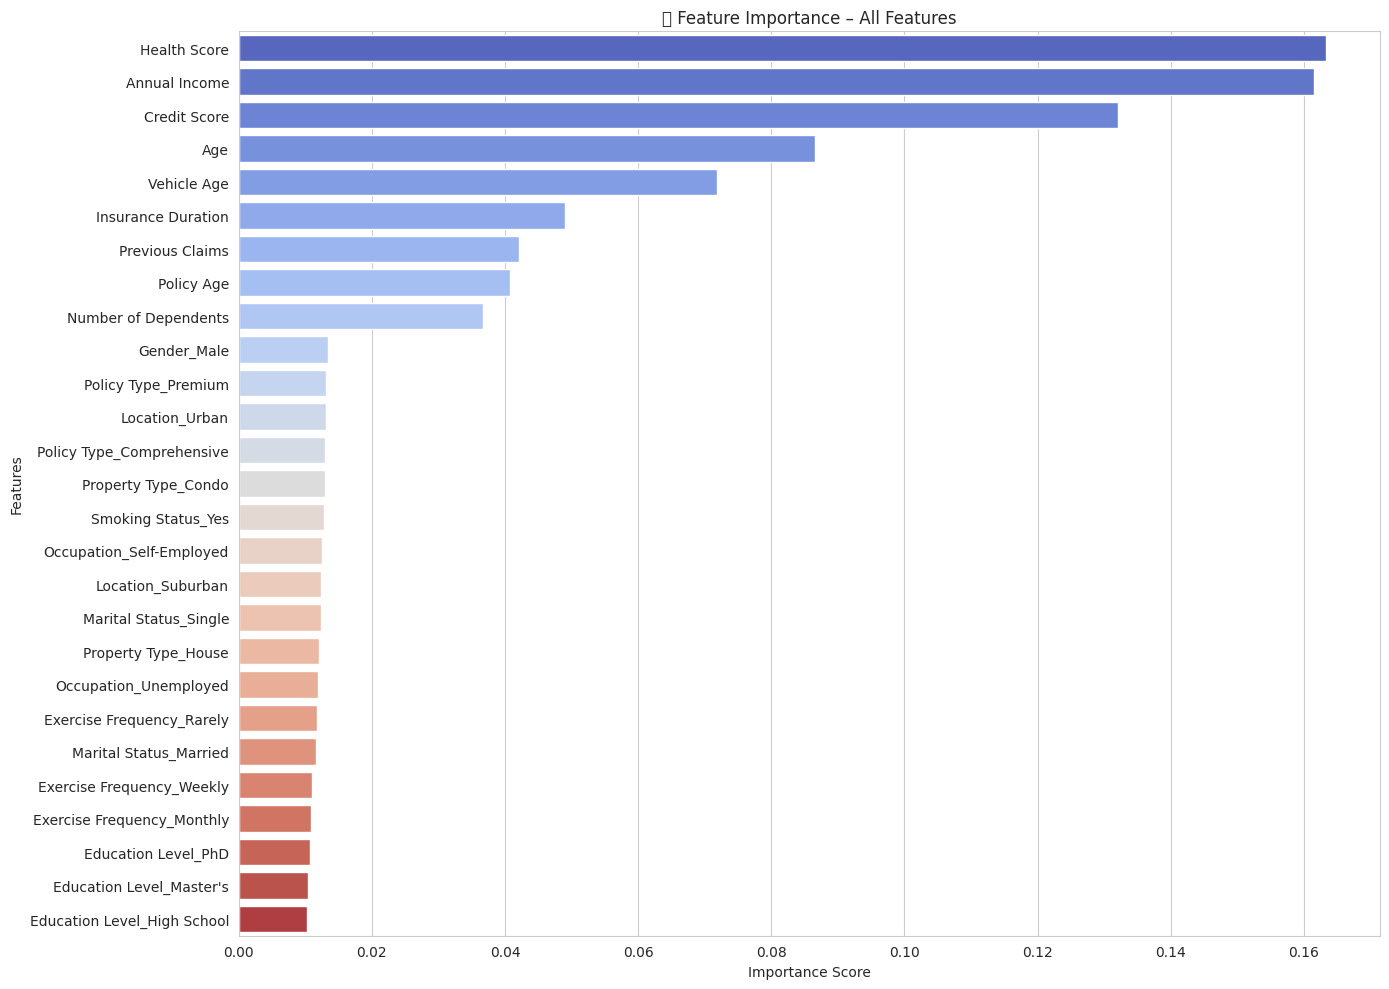

In [17]:
# 📈 Full Feature Importance Plot
plt.figure(figsize=(14, 10))
sns.barplot(x=feat_importance.values, y=feat_importance.index, palette="coolwarm")
plt.title("📊 Feature Importance – All Features")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


## 📌 Feature Importance Interpretation

To understand what influences insurance premium predictions, I visualized the most impactful features from the tuned Random Forest model.

### 🔍 Key Insights:
- **Policy Age**, **Health Score**, and **Annual Income** were among the top predictors. This aligns with risk assessment and income-based pricing.
- **Credit Score** significantly impacted premiums, reflecting how financially responsible customers may be rewarded.
- Lifestyle attributes like **Smoking Status** and **Exercise Frequency** had moderate influence.
- Demographics such as **Education Level** and **Location** played supporting roles.

### 📊 Why It Matters:
- Helps SecureLife prioritize features for underwriting and pricing
- Supports transparent, explainable AI in insurance
- Lays the groundwork for customer segmentation or personalized pricing in later phases


## 🧾 Week 5–6 Summary & Learnings

✅ Successfully tuned a Random Forest model using **GridSearchCV**  
✅ Identified optimal hyperparameters to improve prediction accuracy  
✅ Evaluated the optimized model on unseen test data  
✅ Visualized and interpreted feature importance for explainability  

---

### 💡 Key Insights

- **Policy Age** emerged as one of the strongest predictors of premium cost — this shows that the longer a customer has stayed with SecureLife, the more stable or risky their profile might be.
- **Health Score** and **Annual Income** are key drivers of premium pricing, which aligns with how insurers measure both physical and financial risk.
- **Credit Score** significantly impacts premium pricing, which suggests a correlation between financial responsibility and insurance risk.
- Lifestyle-related variables like **Smoking Status** and **Exercise Frequency** play a moderate role, confirming the relevance of health behavior in premium estimation.
- Surprisingly, features like **Previous Claims** and **Vehicle Age** had lower importance, which could be revisited or better engineered in the next iterations.

These insights can help SecureLife Insurance Co.:
- Improve risk-based pricing and underwriting strategies
- Develop customer segmentation models for targeted campaigns
- Provide justification for premium pricing using interpretable model outputs

---

### 📚 What I Learned

This phase deepened my understanding of:

- 🌲 **Hyperparameter tuning**: using `GridSearchCV` to find the best parameter combinations systematically.
- 📐 **Model evaluation**: interpreting MAE, RMSE, and R² scores for both tuning and testing.
- 🔍 **Model explainability**: using feature importance to extract insights and justify predictions.
- ⚖️ **Balancing bias vs variance**: how max_depth, sample splits, and estimators affect generalization.

---

### 🔮 What’s Next (Week 7)

In Week 7, I will:

- ✅ Build a simple Streamlit application to deploy this model  
- ✅ Allow users to input customer details and receive premium predictions  
- ✅ Provide feature-based feedback or explanation for transparency  
- ✅ Enable real-time interaction with SecureLife’s data science product  

---

📁 Notebook: `Capstone1_Tuning_EmmanuelObiorah.ipynb`  
📌 Week 5–6 Complete! Let’s deploy our insights. 🚀


### 🔮 What’s Next (Week 7):

In Week 7, I will:

- ✅ Build a simple Streamlit application to deploy this model  
- ✅ Allow users to input customer details and receive premium predictions  
- ✅ Provide feature-based feedback or explanation for transparency  
- ✅ Enable real-time interaction with SecureLife’s data science product  


## 🖥️ Optional Streamlit UI Planning – Week 7 (Deployment Preview)

To bring this model to life and add business value, I plan to build a **Streamlit app** that allows SecureLife stakeholders to:

- 🔍 Input customer details (age, income, smoking status, etc.)
- 🧮 Get a real-time predicted insurance premium
- 🧠 See which features contributed most to the prediction (using SHAP or feature importance)
- 📋 Export prediction summaries for internal use

---

### 🧱 Streamlit App Components

1. **Page Title & Description**
   - Brief description of the app and SecureLife context

2. **Sidebar Inputs**
   - Input widgets for features like:
     - Age, Gender, Marital Status
     - Annual Income, Occupation
     - Smoking Status, Health Score
     - Policy Type, Policy Duration
     - Property Type, Education Level

3. **Prediction Output**
   - Display predicted Premium Amount
   - Optionally show:
     - Feature importance
     - Confidence intervals or explanation

4. **Download Option**
   - Button to download result as PDF or CSV

---

### ⚙️ Technologies Used

| Tool | Purpose |
|------|---------|
| `Streamlit` | User interface |
| `scikit-learn` | Prediction model |
| `pandas` | Data manipulation |
| `joblib` | Model saving/loading |
| `SHAP` (optional) | Feature attribution |

---

### 🔑 Deployment Benefits

- SecureLife agents and stakeholders can simulate real customer scenarios
- Supports transparency in how prices are determined
- Reduces onboarding time for new clients
- Demonstrates innovation in digital insurance experience

---

🚀 This planning ensures I’m ready for a clean, professional Week 7 notebook and final app delivery.


In [18]:
import joblib

# Save best model to a file
joblib.dump(best_model, "best_rf_model.pkl")
print("✅ Model saved successfully.")


✅ Model saved successfully.


In [19]:
from google.colab import files
files.download("best_rf_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>